In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 5
%autosave 15

import sklearn as sk
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 15 seconds


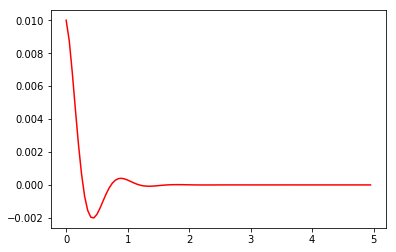

In [6]:
def pid(angle0, vel0, Kp, Ki, Kd, steps, dt=0.05):
    A = 6.0
    B1 = 0.01008
    B2 = -4.9
    path = [angle0, angle0]
    pathVel = [vel0, vel0]
    pathAccel = []
    Carray = []
    eint = 0.0
    for i in range(steps - 1):
        q = path[-1]
        qprev =  path[-2]
        qdot = pathVel[-1]
        qdotdot = (pathVel[-1] - pathVel[-2]) / dt
        pathAccel.append(qdotdot)
        e = -q
        edot = -qdot
        eint += e * dt
        C = Kp*e + Kd*edot + Ki*eint
        Carray.append(C)
        qnext = (A * C - B1 * path[-2] / dt ** 2 + 2 * B1 * path[-1] / dt ** 2 - B2 * path[-1]) * dt ** 2 / B1
        if qnext > 1.57:
            qnext = 1.57
        if qnext < -1.57:
            qnext = -1.57
        qvelnext = (qnext - q) / dt
        path.append(qnext)
        pathVel.append(qvelnext)
    return (path[1:], pathVel[1:], pathAccel, Carray)

dt = 0.05
x, xd, xdd, c = pid(0.01, 0, 0.9, 0.00, 0.01, 100, dt)
plt.plot([dt * i for i in range(len(x))], x, "r")